# Exploration

## Read the data

In [1]:
import pandas as pd

## Read the data
data = pd.read_csv('WELFake_Dataset.csv.zip', index_col=0)

In [2]:
## Check

data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
## Shape of the data -- number of rows and columns
data.shape

(72134, 3)

We have **72,134** rows, as mentioned in the data card of the Kaggle page.

* The preamble also mentions that there is about a half split of real and fake news, with 35k real and 37k fake news. We can verify below

In [4]:
data.label.value_counts()

1    37106
0    35028
Name: label, dtype: int64

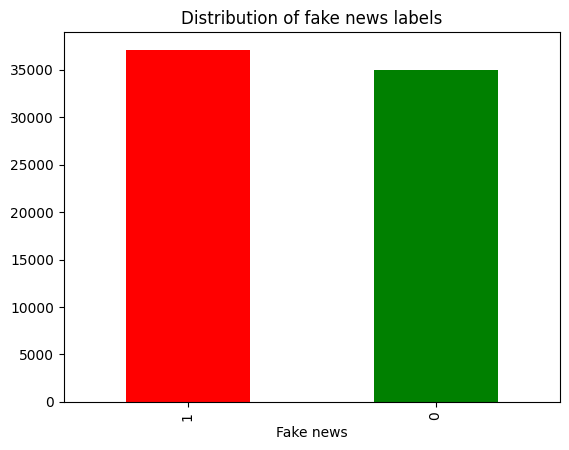

In [5]:
import matplotlib.pyplot as plt

data.label.value_counts().plot(kind = 'bar', color = ['red','green'])
plt.xlabel("Fake news")
plt.title("Distribution of fake news labels")
plt.show()

## Missing data

In [6]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [7]:
data = data.fillna(' ')

In [8]:
## Check after replacing NA with empty
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

* We will replace the missing values with blanks, then merge the two columns (titles and text) so that we have as much data to work with as possible

# Step 2: Preprocessing

## Combining both text and title

In [9]:
data['Full_text'] = data['title'] + data['text']

## Check
print(data.head())

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                           Full_text  
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  
1     Did they post their votes for Hillary already?  
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...  
3  Bobby Jindal, raised Hindu, uses story of Chri...  
4  SATAN 

## Look at some examples of fake and real news

### Fake news examples

In [10]:
data[data.label == 1].Full_text

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1           Did they post their votes for Hillary already?
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
4        SATAN 2: Russia unvelis an image of its terrif...
5        About Time! Christian Group Sues Amazon and SP...
                               ...                        
72125    WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...
72127    WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...
72128    JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...
72130     WATCH: Giuliani Demands That Democrats Apolog...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: Full_text, Length: 37106, dtype: object

In [11]:
## First thousand characters
print(data[data.label == 1].Full_text[0][0:1000])

LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 

In [12]:
## First thousand characters
print(data[data.label == 1].Full_text[1][0:1000])

 Did they post their votes for Hillary already?


In [13]:
## First thousand characters
print(data[data.label == 1].Full_text[2][0:1000])

UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO] Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change.    Loretta Lynch aka Eric Holder in a skirt


### Real news examples

In [14]:
## First thousand characters
print(data[data.label == 0].Full_text)

3        Bobby Jindal, raised Hindu, uses story of Chri...
11       May Brexit offer would hurt, cost EU citizens ...
12       Schumer calls on Trump to appoint official to ...
14       No Change Expected for ESPN Political Agenda D...
15       Billionaire Odebrecht in Brazil scandal releas...
                               ...                        
72124    An Unlikely Contender Rises in France as the A...
72126    Determined to kill: Can tough gun laws end mas...
72129    Russians steal research on Trump in hack of U....
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
Name: Full_text, Length: 35028, dtype: object


In [15]:
print(data[data.label == 0].Full_text[3][0:1000])

Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bidA dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”

Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.

“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”

Jindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to fin

In [16]:
print(data[data.label == 0].Full_text[11][0:1000])

May Brexit offer would hurt, cost EU citizens - EU parliamentBRUSSELS (Reuters) - British Prime Minister Theresa May s offer of  settled status  for EU residents is flawed and will leave them with fewer rights after Brexit, the European Parliament s Brexit coordinator said on Tuesday. A family of five could face a bill of 360 pounds to acquire the new status, Guy Verhofstadt told May s Brexit Secretary David Davis in a letter seen by Reuters    a very significant amount for a family on low income . Listing three other concerns for the EU legislature, which must approve any treaty on the March 2019 exit, Verhofstadt told Davis:  Under your proposals, EU citizens will definitely notice a deterioration of their status as a result of Brexit. And the Parliament s aim all along has been that EU citizens, and UK citizens in the EU-27, should notice no difference.  Verhofstadt, a former Belgian prime minister, wrote in response to Davis, who had written to him after Parliament complained last 

## CLEANING: Lowercasing + remove stop words + remove punctuation

In [17]:
from spacy.lang.en import English
from nltk.corpus import stopwords
import nltk
import time

## download the dictionary for stopwords
nltk.download('stopwords')

## get the set of stopwords
stop_words_set = set(stopwords.words('english'))

## Load English tokenizer from spacy
nlp = English()
tokenizer = nlp.tokenizer ## make instance



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
## Create function to clean text -- lowercase, remove non alphanumeric, remove stop words
def optimized_preprocess(texts): ## Takes in a list of texts, i.e. the entire corpus
    result = []

    # Tokenize using spacy's tokenizer
    for text in texts:
        tokens = [token.text.lower() for token in tokenizer(text) if token.text.isalpha() and token.text.lower() not in stop_words_set]
        result.append(" ".join(tokens))

    return result

# Process data
s = time.time()
preprocessed_texts = optimized_preprocess(data.Full_text)
print('Time to clean ', time.time() - s)

Time to clean  189.0708351135254


In [19]:
## Save a new column in the dataset
data['Full_text_cleaned'] = preprocessed_texts

In [20]:
## Check cleaned text
print(data.Full_text_cleaned.head())

## Read some in full
print(data.Full_text_cleaned[10][0:1000])

0    law enforcement high alert following threats c...
1                           post votes hillary already
2    unbelievable obama attorney general says charl...
3    bobby jindal raised hindu uses story christian...
4    satan russia unvelis image terrifying new supe...
Name: Full_text_cleaned, dtype: object
gop senator smacked punchable alt right nazi internetthe punchable alt right nazi internet got thorough beatdown ben sasse r twitter epic tweetstorm richard spencer alt right leader become human punching bag got racism smacked republican senator thursday white nationalist tweeted goober conservatives blame russia racial divisions united states spencer responding tweet sasse sent wednesday ben sasse shared article regarding james lankford r explained russian internet trolls helped fuel divisions controversy donald trump ignited nfl athletes choose kneel rather stand national anthem protest racial inequality police brutality one loves american vs american fighting putin intel age

## Explore some differences between real and fake texts

### Comparing choice of vocabulary

Let us count the word frequency used in real and fake news, and compare the top choices of vocabulary across the two, to see if anything interesting emerges.

In [21]:
from collections import Counter ## for counting words

## Get real and fake subsets
fake_text = data[data.label == 1]["Full_text_cleaned"]
real_text = data[data.label == 0]["Full_text_cleaned"]

In [22]:
## Entire vocabulary
vocab_set = set((" ".join(data.Full_text_cleaned)).split())
non_unique_set = (" ".join(data.Full_text_cleaned)).split()

In [23]:
## Get sizes of vocab, entire corpus, ratio
print('Vocab size : ', len(vocab_set))
print('Entire word count : ', len(non_unique_set))
print('Ratio of word count to vocab size : ', len(non_unique_set)/len(vocab_set) )

Vocab size :  238524
Entire word count :  22156082
Ratio of word count to vocab size :  92.88827120122085


On average, each word is used about 92 times.
* Vocab size ~ 200 k
* Entire corpus word count ~ 22 million

In [24]:
## Check
print(fake_text.head())
print(real_text.head())

0    law enforcement high alert following threats c...
1                           post votes hillary already
2    unbelievable obama attorney general says charl...
4    satan russia unvelis image terrifying new supe...
5    time christian group sues amazon splc designat...
Name: Full_text_cleaned, dtype: object
3     bobby jindal raised hindu uses story christian...
11    may brexit offer would hurt cost eu citizens e...
12    schumer calls trump appoint official oversee p...
14    change expected espn political agenda despite ...
15    billionaire odebrecht brazil scandal released ...
Name: Full_text_cleaned, dtype: object


In [25]:
## COUNT THE WORDS

## First, turn a list of lists into just one list -- i.e. join all documents together into
## one giant document/ string
fake_text_giant_string = " ".join(fake_text)
print(len(fake_text_giant_string))
real_text_giant_string = " ".join(real_text)
print(len(real_text_giant_string))


## Now, update to the Counter object to begin counting
fake_words_counter = Counter(fake_text_giant_string.split())
real_words_counter = Counter(real_text_giant_string.split())


78106917
86186099


## Counting the words used in real and fake news

In [26]:
## See results
print(type(fake_words_counter))
print(fake_words_counter.most_common(10)) ## Most common words for fake news
print(real_words_counter.most_common(10)) ## Most common words for real news


<class 'collections.Counter'>
[('trump', 116179), ('said', 49898), ('people', 49137), ('clinton', 47358), ('one', 46387), ('would', 44259), ('president', 39690), ('us', 35508), ('hillary', 34678), ('like', 32200)]
[('said', 184657), ('trump', 115351), ('would', 64111), ('president', 51695), ('new', 49311), ('one', 43012), ('people', 41983), ('state', 39740), ('also', 36630), ('states', 31833)]


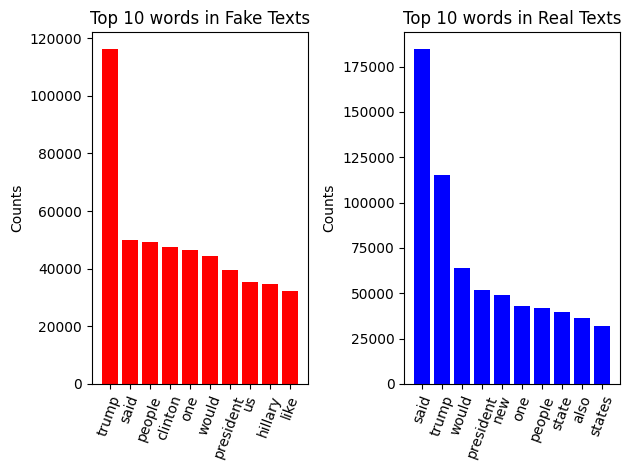

In [27]:
## Visualise the top words

fake_top_10 = fake_words_counter.most_common(10)
x,y = zip(*fake_top_10)

true_top_10 = real_words_counter.most_common(10)
x2,y2 = zip(*true_top_10)

## Plot
# Plotting fake data
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.bar(x, y, color='red')
plt.title('Top 10 words in Fake Texts')
plt.xticks(rotation=70)
plt.ylabel('Counts')

# Plotting real data
plt.subplot(1, 2, 2)
plt.bar(x2, y2, color='blue')
plt.title('Top 10 words in Real Texts')
plt.xticks(rotation=70)
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

### Word clouds

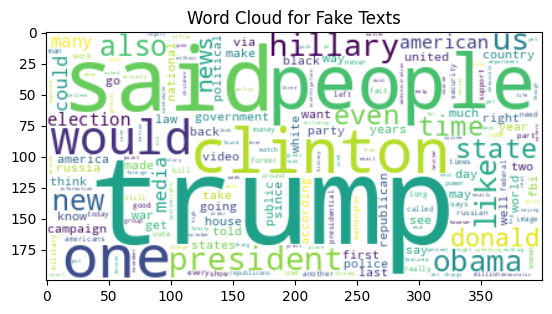

In [28]:
from wordcloud import WordCloud

fake_WC = WordCloud(background_color = 'white').generate_from_frequencies(fake_words_counter)

plt.imshow(fake_WC, interpolation = 'bilinear')
plt.title('Word Cloud for Fake Texts')
plt.show()

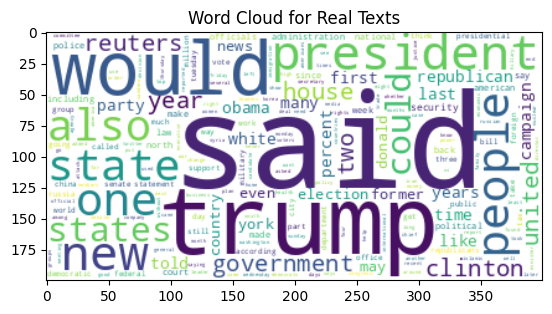

In [29]:
real_WC = WordCloud(background_color = 'white').generate_from_frequencies(real_words_counter)

plt.imshow(real_WC, interpolation = 'bilinear')
plt.title('Word Cloud for Real Texts')
plt.show()

## Length of documents

In [30]:
fake_lengths = fake_text.str.split().apply(len)
print(fake_lengths)

real_lengths = real_text.str.split().apply(len)
print(real_lengths)


0        446
1          4
2         35
4        192
5        151
        ... 
72125      9
72127    134
72128    456
72130    344
72133    241
Name: Full_text_cleaned, Length: 37106, dtype: int64
3         743
11        231
12        265
14        297
15        165
         ... 
72124     643
72126    1260
72129     446
72131     270
72132     349
Name: Full_text_cleaned, Length: 35028, dtype: int64


### Visualise differences in length -- are real text longer or shorter?

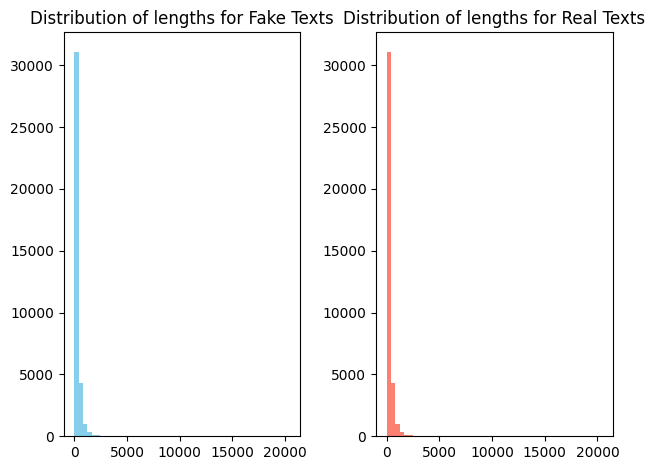

In [31]:
## Fake one
plt.subplot(1,2,1)
plt.hist(fake_lengths, bins = 50, color = 'skyblue')
plt.title('Distribution of lengths for Fake Texts')

## Real one
plt.subplot(1,2,2)
plt.hist(fake_lengths, bins = 50, color = 'salmon')
plt.title('Distribution of lengths for Real Texts')

##
plt.tight_layout()
plt.show()

We can see that both are highly right skewed -- most documents have lengths less than 2500 and most are close to 0. It is hard to see any differences between both distributions, hence the document length may not be a useful indicator.

# Feature engineering: Bags of Words model

NLP models cannot take in raw text, as machine learning models only understand numbers and vectors. To feed our real and fake news data into a model, we must first convert the text into something vectorial, and one option is the **BOW** model.

The **BoW** model treats text as an unordered set of words, where the sequence doesn't matter. We can already see how this is an obvious limitation, but this can be the first way forward.

The first thing BoW does it to **create a vocabulary of all the words**. This will essentially become our predictors, i.e. each word is a predictor or a feature (e.g. such as how education, age, industry are predictors for wage prediction). In this case, each document is a sample, as will be represented by a vector whose length is equal to the size of the vocabulary. Each entry corresponds to the number of words in for that unique word predictor of the particular document -- i.e. the i,j-th entry corresponds to the frequency of the jth word for the ith document.

## Transforming text to BoW -- Count Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

## Instantiate vectorizer
vectorizer = CountVectorizer()

In [33]:
## Save text
preprocessed_text = data.Full_text_cleaned

## Apply vectorizer to get the bag of words matrix
X = vectorizer.fit_transform(preprocessed_text)

In [34]:
## Shape
print(X.shape)

(72134, 238433)


As expected, we have about 70k documents, but the vocab size is 200k. This number of columns is very big (imagine 200k predictors), and this may result in overfitting.

We try to make number of features smaller via some arguments of countvectorizer

In [35]:
## Re-instantiate with all the new parameters
vectorizer = CountVectorizer(min_df = 100, ## require a word to be in at least 100 documents
                            max_df = 0.90, ## is a word appears in 90% or more of documents, then ignore, since it may be too common
                            stop_words = 'english', ## use stopwords again, although we had used it from spacy already
                            max_features = 10000)


## Now, reapply vectorizer
X = vectorizer.fit_transform(preprocessed_text) ## use only 10000 most common words

In [36]:
## Check again
print(X.shape) ## confirmed that we have 10000 predictors

(72134, 10000)


In [37]:
## See a sample
print(X[0:100,0:100])

  (0, 72)	1
  (3, 21)	1
  (3, 74)	1
  (3, 77)	1
  (4, 67)	1
  (4, 68)	1
  (4, 17)	1
  (9, 54)	2
  (12, 54)	1
  (12, 16)	1
  (14, 54)	1
  (15, 68)	2
  (16, 17)	1
  (18, 68)	1
  (18, 17)	1
  (18, 65)	5
  (18, 66)	1
  (18, 2)	1
  (19, 54)	1
  (19, 70)	1
  (20, 31)	1
  (21, 55)	1
  (22, 31)	1
  (23, 17)	1
  (23, 54)	1
  :	:
  (81, 71)	2
  (81, 73)	1
  (81, 35)	4
  (81, 96)	2
  (81, 53)	1
  (82, 76)	1
  (83, 77)	1
  (83, 68)	1
  (83, 17)	1
  (83, 35)	2
  (85, 11)	1
  (85, 46)	1
  (86, 48)	1
  (87, 17)	1
  (87, 7)	1
  (88, 68)	1
  (89, 16)	1
  (90, 86)	1
  (93, 48)	1
  (95, 68)	1
  (95, 70)	1
  (95, 76)	1
  (99, 17)	1
  (99, 61)	1
  (99, 37)	1


## Display of count vectorized data -- BoW

In [38]:
vocab = vectorizer.vocabulary_

print(type(vocab))
print(len(vocab))

## Sum the occurrences of the words across the rows of the matrix
df_count = X.sum(axis=0).A1

countvect_df = pd.DataFrame(list(zip(vocab.keys(), df_count)), ## extract out the items from the dictionary so that we can turn it into a pandas dataframe
                           columns = ['word', 'count'])

print(countvect_df.sort_values('count', ascending = False))

<class 'dict'>
10000
           word   count
7821    excuses  234555
9297      bigot  231530
6830  watergate   91385
6459  interpret   91120
5957   slightly   78983
...         ...     ...
717       click     211
4851     gained     211
265        girl     211
6233   feminist     211
2936  condition     211

[10000 rows x 2 columns]


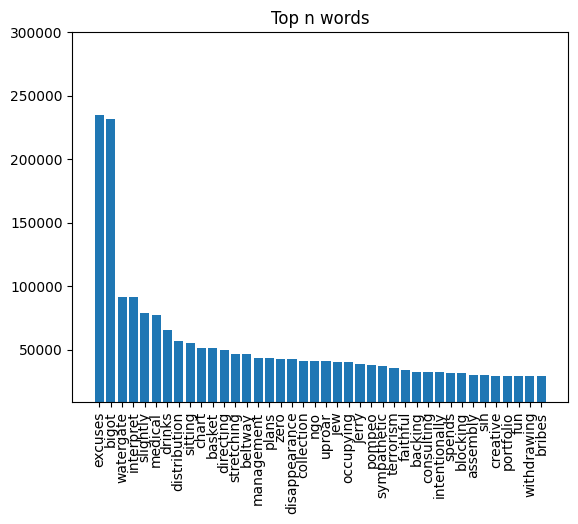

In [39]:
## Get top ten words to visualize
n = 40
top_words_from_countvec = countvect_df.sort_values('count', ascending = False).head(n)

## Plot
plt.bar(top_words_from_countvec['word'], top_words_from_countvec['count'])
plt.ylim([9000, 300000 + 100])
plt.xticks(rotation = 90)
plt.title("Top n words")
plt.show()

We see some non-English, possibly Russian words that are highly used in our corpus and forms the most common word features for our Bag of Words model.

## Train test split

Use 80-20 train test split

In [40]:
from sklearn.model_selection import train_test_split

y = data['label']  # Assuming 'label' is the column with fake/real labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
## Check dimensions

print('Train set ', X_train.shape)
print('Test set ', X_test.shape)

Train set  (57707, 10000)
Test set  (14427, 10000)


# First set: Use different models on BOW

## BOW 1: Logistic regression

In [42]:
## TRAIN
from sklearn.linear_model import LogisticRegression

s = time.time()
log_clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_clf.fit(X_train, y_train)
time_for_logreg = time.time() - s
print("Time to fit logistic regression :", time_for_logreg )

Time to fit logistic regression : 27.63245129585266


In [43]:
## Evaluate

from sklearn.metrics import classification_report, confusion_matrix

y_pred_log = log_clf.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7089
           1       0.94      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



Text(50.722222222222214, 0.5, 'Real Labels')

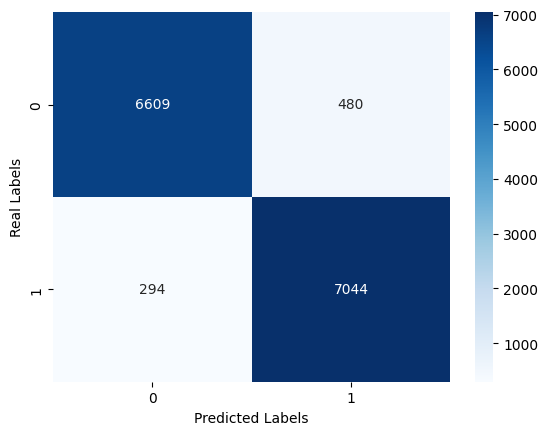

In [44]:
## Evaluate with Confusion Matrix

import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

## BOW2: SVM

SVM may be good for high dimensionality data, such as text that we are working on, with 10000 predictors. In such cases we use linear kernels, and it is interesting to see if it gives similar results to Logistic regression.

In [45]:
from sklearn.svm import LinearSVC

linear_svc_clf = LinearSVC(max_iter = 100000) ##increase max iter to 100k for convergence
s = time.time()
linear_svc_clf.fit(X_train, y_train)
time_for_linear_svm = time.time() - s
print("Time to fit SVM :", time_for_linear_svm)

Time to fit SVM : 944.2152018547058


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time fitting SVM -- much longer than fitting a NaiveBayes, possibly due to the large feature space of the data.

In [46]:
## Evaluate
y_pred_svc = linear_svc_clf.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7089
           1       0.93      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



Text(50.722222222222214, 0.5, 'Real Labels')

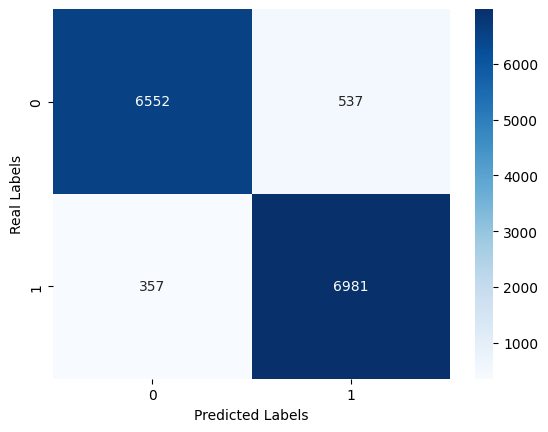

In [47]:
## Evaluate with Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

#### Linear SVM vs Naive Bayes

* Naive Bayes regression fits to data much quicker
* Accuracy is roughly the same


## BOW3: Random forests

For the forest, we will use 300 trees, and default values for the other hyperparameters

* ceriterion: gini
* max_depth = none, i.e. expanded until pure or less than min_samples_split
* max_features = sqrt

Random forests work by bootstrapping the dataset to train slightly different trees, and then all the trees are combined to form an ensemble model, where the final decision is an equally weighted aggregate of the votes from all trees. The bootstrapping method, along with randomly selecting a subset of predictors to choose for for each split of the trees, help to decorrelate the trees such that they offer different insights into the data. Trees are usually fitted by finding the best feature and its best split at each branch of the tree and choosing the one that best minimises some cost function, such as entropy or gini impurity.

Random forests help to generalise an otherwise overfitted single decision tree.

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=300, n_jobs = -1)
print(rf1)

s = time.time()
rf1.fit(X_train, y_train)
time_for_rf_1 = time.time() - s
print("Time to fit RF :", time_for_rf_1)

RandomForestClassifier(n_estimators=300, n_jobs=-1)
Time to fit RF : 619.0576620101929


In [49]:
## Evaluate
y_pred_rf1 = rf1.predict(X_test)
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7089
           1       0.95      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



Text(50.722222222222214, 0.5, 'Real Labels')

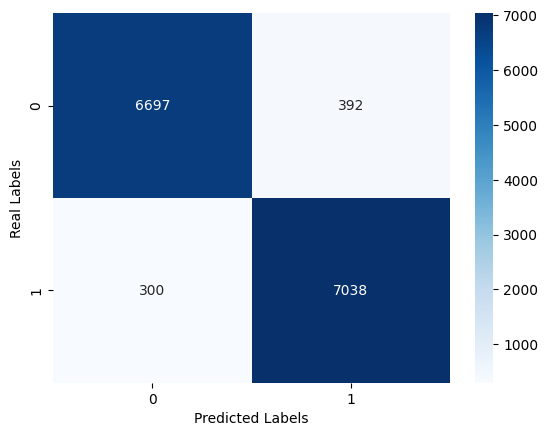

In [50]:
## Evaluate with Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred_rf1), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

## BOW 3.2: Tuned RF

There are many hyperparameters to be tuned with random forests.

We will use random search (cross validation) instead of gridsearch, which may be faster and more efficient. This is done by randomly selecting points in the hyperparameter space, instead of using all of them.

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
## Set up hyperparameter space

param_grid = {
    'n_estimators' : [50, 150, 300, 450],
    'max_depth': [None, 10, 20, 40],
    'max_features': ['sqrt', 'log2']
}

In [53]:
## Reinstantiate
rf = RandomForestClassifier(random_state = 42)

## Fit the random search object (i.e. start fitting rfs) and find the best model
s = time.time()

## init the RandomizedSearchCV object as random_search, stating the grid of params to test
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, ## number of parameter settings being sampled (number of combinations being tried)
                                   cv=3, n_jobs=-1, verbose=2, random_state=42)
## fit the random search object
random_search.fit(X_train, y_train)
time_for_rf_2_hypertun = time.time() - s
print("Time for hyperparameter tuning via random search CV ", time_for_rf_2_hypertun)
best_rf = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time for hyperparameter tuning via random search CV  1230.6290895938873


For the sake of saving time fitting the random search, we opt for 10 iterations i.e. 10 combinations tested

In [54]:
y_pred_rf2 = best_rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf2))

Random Forest Results
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7089
           1       0.93      0.96      0.95      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



In [55]:
## For fair comparison, we want to also know the time taken to fit this new 'ideal' rf

# save tuned hyperparameters
best_params_rf_2 = random_search.best_params_

# then init the rf model with the best params
rf_2_tuned = RandomForestClassifier(**best_params_rf_2) ## need ** to unpack the dictionary

## Time the duration for fitting
s = time.time()
rf_2_tuned.fit(X_train, y_train)
time_for_rf_tuned = time.time() - s
print('Time to fit tuned rf ', time_for_rf_tuned)

Time to fit tuned rf  262.78835010528564


# Second set: Use different feature engineering -- TFIDF

TFIDF gives more weight to terms that are frequent in a particular document but not in many documents across the board, and is a different way of vectorising a particular document apart from BoW which just counts the number of terms that is in a specific document, disregarding how common/uncommon it is in others.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Use the TfidfVectorizer -- same parameters are before
vectoriser = TfidfVectorizer(min_df=100,
                             max_df=0.90,
                             stop_words='english',
                             max_features=10000)

X = vectoriser.fit_transform(preprocessed_text)

y = data['label']
## Same train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Log Reg
s = time.time()
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
time_for_logreg_tfidf = time.time() - s
print("Time to fit logistic regression:", time_for_logreg_tfidf)

# 2. SVM Linear
s = time.time()
svm_linear_clf = LinearSVC(max_iter=1000)
svm_linear_clf.fit(X_train, y_train)
time_for_linear_svm_tfidf = time.time() - s
print("Time to fit SVM linear:", time_for_linear_svm_tfidf)


# Random Forest
s = time.time()
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
time_for_untuned_rf_tfidf = time.time() - s
print("Time to fit Random Forest:", time_for_untuned_rf_tfidf)

Time to fit logistic regression: 2.3660826683044434
Time to fit SVM linear: 1.9456665515899658
Time to fit Random Forest: 262.35893034935


In [57]:
## Evaluation
## Log reg
y_pred_log = log_clf.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

## SVM
y_pred_svm = svm_linear_clf.predict(X_test)
print("SVM Linear Results")
print(classification_report(y_test, y_pred_svm))

## RF
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7089
           1       0.94      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427

SVM Linear Results
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7089
           1       0.95      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427

Random Forest Results
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7089
           1       0.94      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weigh

### Save the results so far

In [58]:
## Time to train, manually save since I forgot to do so when fitting

## Model prediction results
acc_bow_logreg = .95
acc_bow_svm = .94
acc_bow_rf_untuned = .95
acc_bow_rf_tuned = .94
acc_tfidf_logreg = .94
acc_tfidf_svm = .95
acc_tfidf_rf_untuned = .95

In [59]:
import pandas as pd

model_comparisons = pd.DataFrame({
    'Vector_type' : ['BOW']*4 + ['TFIDF']*3,
    'Model': ["Logistic reg", 'SVM', 'RF', 'RF tuned', 'Logistic reg', 'SVM', 'RF'],
    'Time_to_fit' : [time_for_logreg, time_for_linear_svm, time_for_rf_1, time_for_rf_tuned, time_for_logreg_tfidf, time_for_linear_svm_tfidf, time_for_untuned_rf_tfidf],
    'Accuracy_score' : [acc_bow_logreg, acc_bow_svm, acc_bow_rf_untuned, acc_bow_rf_tuned, acc_tfidf_logreg, acc_tfidf_svm, acc_tfidf_rf_untuned],
    'No_words_predictors' : 10000
}
)

In [60]:
print(model_comparisons.sort_values('Time_to_fit', ascending = True))

  Vector_type         Model  Time_to_fit  Accuracy_score  No_words_predictors
5       TFIDF           SVM     1.945667            0.95                10000
4       TFIDF  Logistic reg     2.366083            0.94                10000
0         BOW  Logistic reg    27.632451            0.95                10000
6       TFIDF            RF   262.358930            0.95                10000
3         BOW      RF tuned   262.788350            0.94                10000
2         BOW            RF   619.057662            0.95                10000
1         BOW           SVM   944.215202            0.94                10000


# What if we had reduced the number of words/predictors to 5000 (i.e. halving the number of columns)?

Will this still be enough information for our models to perform well?


## BOW (5000 predictors)

In [61]:
## Create instance of BOW vectoriser
bow_vectoriser = CountVectorizer(min_df = 100, ## require a word to be in at least 100 documents
                            max_df = 0.90, ## is a word appears in 90% or more of documents, then ignore, since it may be too common
                            stop_words = 'english', ## use stopwords again, although we had used it from spacy already
                            max_features = 5000) ## now half only

## Apply vectorisers to data
X = bow_vectoriser.fit_transform(preprocessed_text)

## Check shape
print(X.shape)

## Train test split
y = data['label']  # Assuming 'label' is the column with fake/real labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## FIT LOG REG MODEL ==========================================================
s = time.time()
log_clf_reduced_preds = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_clf_reduced_preds.fit(X_train, y_train)
print("Time to fit logistic regression :", time.time() - s)

(72134, 5000)
Time to fit logistic regression : 20.59636878967285


In [62]:
## EVALUATE LOG REG MODEL --------------------------------------------------------
from sklearn.metrics import classification_report
y_pred_log_reg_reduced_preds = log_clf_reduced_preds.predict(X_test)
print(classification_report(y_test, y_pred_log_reg_reduced_preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7089
           1       0.92      0.94      0.93      7338

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



## TFIDF (5000 predictors)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Use the TfidfVectorizer -- same parameters are before
vectoriser = TfidfVectorizer(min_df=100,
                             max_df=0.90,
                             stop_words='english',
                             max_features=5000)

X = vectoriser.fit_transform(preprocessed_text)

y = data['label']
## Same train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Log Reg
s = time.time()
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
print("Time to fit logistic regression:", time.time() - s)



Time to fit logistic regression: 3.669062376022339


In [64]:
## EVALUATE LOG REG MODEL --------------------------------------------------------
from sklearn.metrics import classification_report
y_pred_log_reg_reduced_preds = log_clf.predict(X_test)
print(classification_report(y_test, y_pred_log_reg_reduced_preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7089
           1       0.93      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



### When feature space was reduced by half,

* Logistic regression did not really suffer much in terms of time taken to fit or accuracy
* TFIDF seemed to work better (slightly) than BOW, and this makes sense since TFIDF captures more information than BOW.

# Word embedding methods

Instead of using methods that vectorise the documents based on words, essentially treating words to be independent (as independent predictors), we try to capture some semantics and meanings of the words instead to see if we can improve the model.

## 1. Using pre-trained word embeddings

We will try to use the GloVe model. GloVe was developed for generating word embeddings, and designed to get semantic relationships between words. Therefore in this space, words with similar meanings will tend to be closer in this new feature space.

In [65]:
import gensim.downloader

glove_model = gensim.downloader.load('glove-wiki-gigaword-100')



[==================================================] 100.0% 128.1/128.1MB downloaded


In [66]:
## Check some stuff from glove
print('Vector sizes are ', glove_model.vector_size) ## 100 dim for feature space -- just nice?


Vector sizes are  100


Our feature space is 100 dimensions -- when compared to the dimensions of BoW and TFIDF where we had chosen to include about 10k words (dimensions), this is considered small

We can test this out by checking the cosine similarity (how similar two words are in the feature space).

In [67]:
## Test it out -- get word vectors
word_vec =glove_model['word']
sent_vec =glove_model['sentence']

## shape
glove_model['word'].shape ## 100 column space that the words exist in

## Test similarity
print('cosine sim between "word" and "sentence" ', glove_model.cosine_similarities(word_vec, [sent_vec]))
print('cosine sim between "word" and "potato" ', glove_model.cosine_similarities(word_vec, [glove_model['potato']]))

## Test on multiple words
glove_model.cosine_similarities(word_vec, [glove_model['potato'],
                                          glove_model['car'],
                                          glove_model['language']])

## Test on the word banana
glove_model.cosine_similarities(glove_model['banana'], [glove_model['apple'],
                                                       glove_model['food'],
                                                       glove_model['object'],
                                                       glove_model['computers']])
## result -- the words get less and less related



cosine sim between "word" and "sentence"  [0.4031449]
cosine sim between "word" and "potato"  [0.2914069]


array([0.5054469 , 0.4017795 , 0.04679427, 0.08940844], dtype=float32)

In [68]:
## Checking that word exists in the vocab
glove_vocab = glove_model.key_to_index

## Check type
print(type(glove_vocab)) ## glove_vocab is a dictionary instead of a list

## Get vocab size
print('Size of vocab ', len(glove_vocab)/1000, ' thousand')

## See some words
list_of_keys = list(glove_vocab.keys())
list_of_values = list(glove_vocab.values())


<class 'dict'>
Size of vocab  400.0  thousand


In [69]:
## Take a peek at the keys and values of the vocab
print(list_of_keys[0:10])
print(list_of_values[0:10])

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Interestingly, **punctuations also have embeddings**, as seen above. Let us take a closer look at those embeddings and find similar 'tokens' to the punctuations.

In [70]:
import numpy as np

## Word embedding for comma
glove_model[',']
## Cosine similarities btn punctuations
print('Cos sim btn "," and "." ', np.dot(glove_model[','], glove_model['.']))
print('Cos sim btn "," and "?" ', np.dot(glove_model[','], glove_model['?']))

## Cosine similarities btn punctuations and words
print('Cos sim btn "," and "hello" ', np.dot(glove_model[','], glove_model['hello']))
print('Cos sim btn "," and "pause" ', np.dot(glove_model[','], glove_model['pause']))
print('Cos sim btn "," and "comma" ', np.dot(glove_model[','], glove_model['pause']))

Cos sim btn "," and "."  26.550135
Cos sim btn "," and "?"  20.919863
Cos sim btn "," and "hello"  4.4000187
Cos sim btn "," and "pause"  5.9220767
Cos sim btn "," and "comma"  5.9220767


In [71]:
## Most similar terms to comma
glove_model.similar_by_word(",")

[('and', 0.8781740665435791),
 ('.', 0.8755987882614136),
 ('while', 0.8525034785270691),
 ('but', 0.8338185548782349),
 ('as', 0.8283949494361877),
 ('also', 0.8065630197525024),
 ('now', 0.8026498556137085),
 ('well', 0.8003395199775696),
 ('one', 0.7802436947822571),
 ('with', 0.779920220375061)]

# Third feature engineering: use the average word embedding of the sentence from GloVe

First, we need to turn the texts into word vectors, since each text has multiple words. This would result in many vectors -- for simplicity, we will take the average of the vectors to result in a single vector for each text. This has some limitations, since it may 'dilute' the meaning of certain important words, but we will go ahead with this for now.

In [72]:
def get_avg_embedding(text): ## Takes in a single text, instead of a list of texts
    ## Tokenise first, get indiv words
    words = text.split()

    ## Get list of word vectors (this would result in many word vectors)
    vectors = [glove_model[word] for word in words if word in glove_vocab] ## make sure that the word is covered by the model

    ## Normalise the vectors for each word
    normalised_vectors = [vector/np.linalg.norm(vector) for vector in vectors] if vectors else None ## If there was no vector in vectors, then return None

    ## Take the average of all
    avg_vector = sum(normalised_vectors)/len(normalised_vectors) if normalised_vectors else None

    return(avg_vector)

## Since we allowed for None in cases where there was no vector (this happens if
# the text had no words that was recognised by the Glove Model), we should make sure
# to check the list of avg embeddings to see if there are empty vectors

In [73]:
s = time.time()
avg_embeddings_X = [get_avg_embedding(text) for text in preprocessed_texts]
print('Time taken to get avg embeddings, via list comprehension method', time.time()- s)

Time taken to get avg embeddings, via list comprehension method 198.89277863502502


This is essentially using a for loop in the list comprehension, which is very slow. A faster way would be to use a parallelised method, under the package 'pandarallel', that complements the Pandas framework. Let us see if it is faster.

In [76]:
!pip install pandarallel
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [77]:
s = time.time()
data['avg_embeddings'] = data.Full_text_cleaned.parallel_apply(get_avg_embedding)
time_for_pandarallel = time.time() - s
print('Time taken to get avg embeddings, via pandarallel method', time_for_pandarallel)

Time taken to get avg embeddings, via pandarallel method 249.62138104438782


In [78]:
print('Percentage decrease in time taken ', (172 - time_for_pandarallel)/172 * 100, ' %')

Percentage decrease in time taken  -45.12870990952781  %


Therefore pandarallel makes a significant reduction in time taken to get the average vector representation of the text.

Check results of the embedding process

In [79]:
print(type(avg_embeddings_X))
print(len(avg_embeddings_X)) ## this is the number of documents

## Look at one of the embeddings
print(type(avg_embeddings_X[0])) ## List of np.arrays
avg_embeddings_X[0].shape ## Each embedding has 100 length, as expected

<class 'list'>
72134
<class 'numpy.ndarray'>


(100,)

In [80]:
## Check if any vector is empty or None

## Recall that if the words in our text dont exist in the glove vocab, the function returns None
## Test the function on some gibberish and see if it returns None
print(get_avg_embedding("sdjfas fasdfjsdfsajfls"))

## Check if there are any None(s) in our result (from the df version)
print("None in DF ", data.avg_embeddings.isna().sum())

## Check again from the list version
print("None in list ", sum(1 for vec in avg_embeddings_X if vec is None))

None
None in DF  13
None in list  13


Turns out that there are missing vectors, possibly due to unrecgonised words. Let us take a closer look at them

In [81]:
data[data.avg_embeddings.isna()][['Full_text', 'Full_text_cleaned', 'label', 'avg_embeddings']]

,Full_text,Full_text_cleaned,label,avg_embeddings
795,https://fedup.wpengine.com/wp-content/uploads/...,,1,None
8909,https://fedup.wpengine.com/wp-content/uploads/...,,1,None
11943,In obamaland...,obamaland,1,None
14238,https://fedup.wpengine.com/wp-content/uploads/...,,1,None
26286,https://fedup.wpengine.com/wp-content/uploads/...,,1,None
27236,https://fedup.wpengine.com/wp-content/uploads/...,,1,None
31816,🙂,,1,None
42774,https://100percentfedup.com/served-roy-moore-v...,,1,None
44862,https://100percentfedup.com/12-yr-old-black-co...,,1,None
52702,https://100percentfedup.com/video-hillary-aske...,,1,None


We see that they are either empty since they were URL links that have been cleared by the preprocessing phase (e.g. removing non alphanumeric terms, removing stopwords) or just trivial one word cases. We can remove them

In [82]:
## Drop NAs/ Nones
print(data.shape)
print(data.dropna(subset = ['avg_embeddings']).shape) ## 13 removed

## Drop
data_no_nas = data.dropna(subset = ['avg_embeddings'])

## Check
print(data_no_nas.head())

(72134, 6)
(72121, 6)
                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                           Full_text  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1     Did they post their votes for Hillary already?   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses st

## Repeat modelling workflow : train test split and fitting on the new X vector embeddings data

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Rmb to use the data without nas, so that there is no inconsistency in the set of X vectors
X = data_no_nas.avg_embeddings.to_list()

y = data_no_nas['label']
## Same train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Check if the data is prepared correctly/ in the right format
print(type(X_train)) ## this is a list -- need to convert to np array
print(type(y_train))

<class 'list'>
<class 'pandas.core.series.Series'>


Currently, our X data is in the form of list of lists. In order to feed into the sklearn algorithms, we need to first convert it to 2D np arrays.

In [84]:
print(len(X_train))

## Convert to 2D np arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

## Check shape
print(X_train.shape)
print(X_test.shape) ## our data is now in 2D arrays, so it is okay

57696
(57696, 100)
(14425, 100)


In [85]:
# 1. Log Reg
s = time.time()
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
time_for_logreg_glove = time.time() - s
print("Time to fit logistic regression:", time_for_logreg_glove)

# 2. SVM Linear
s = time.time()
svm_linear_clf = LinearSVC(max_iter=1000)
svm_linear_clf.fit(X_train, y_train)
time_for_linear_svm_glove = time.time() - s
print("Time to fit SVM linear:", time_for_linear_svm_glove)


# Random Forest
s = time.time()
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
time_for_untuned_rf_glove = time.time() - s
print("Time to fit Random Forest:", time_for_untuned_rf_glove)

Time to fit logistic regression: 0.6580338478088379
Time to fit SVM linear: 2.5585014820098877
Time to fit Random Forest: 87.30173254013062


This is a significant improvement over some of the previous methods. This is possibly due to the smaller predictor space

In [86]:
## Model evaluations
print(classification_report(log_clf.predict(X_test), y_test))
print(classification_report(svm_linear_clf.predict(X_test), y_test))
print(classification_report(rf_clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6882
           1       0.86      0.84      0.85      7543

    accuracy                           0.84     14425
   macro avg       0.84      0.84      0.84     14425
weighted avg       0.84      0.84      0.84     14425

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6958
           1       0.86      0.85      0.86      7467

    accuracy                           0.85     14425
   macro avg       0.85      0.85      0.85     14425
weighted avg       0.85      0.85      0.85     14425

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6581
           1       0.92      0.86      0.89      7844

    accuracy                           0.88     14425
   macro avg       0.88      0.89      0.88     14425
weighted avg       0.89      0.88      0.88     14425



## Results of GloVe representations

Although much faster to fit the models, we suffer quite a bit in terms of accuracy scores.

### Nature of representation

While BoW and TFIDF capture the occurance of words independently, the glove method we used essentially took the 'center' of the word embedded vectors of each text, since we took their average. This might end up cancelling out some of the meaning of the words, losing out on granularity. It is also possible that some of the words, which were crucial in determining the outcome of the text in being real or false news, were not in the vocabulary of the glove model and thus not factored into the data, which will cause a loss of importasnt information.

# Converting text to sequences with Keras, with embedding layer in the neural network

How it works

* integer encoding: the text_to_sequences method converts texts to integers based on the vocabulary of the corpus.

* we then have a **sequence of integers** (text to sequences), since models cannot understand words but only numbers

* we pad each vector such that there is a consistent number of integers

* the first layer of the neural network will be the embedding layer, which is a special kind of layer that *looks up each integer (word index) and maps it to a dense vector*, which is the semantic representation, same as the one we used with GloVe.

* then we connect to a fully connected layer, where the last layer will be a single neuron with a sigmoid activation function - since we are making a binary classification

In [87]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [88]:
## Instantiate the keras tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token = '<00v>') ## this is for out of vocab
## terms -- therefore when testing, if the model sees a word that has not been trained,
## it will map it to 1 instead of removing the term

In [89]:
## Fit the tokenizer to the corpus
tokenizer.fit_on_texts(data.Full_text_cleaned) ## use fit on texts method as we have a series or list of texts
word_index = tokenizer.word_index

From this [stackoverflow answer](http://https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do), the fit on text method updates the internal vocab based on a list of texts, creating a vocab index based on word frequency, then the texts to sequences transforms each text in texts to a sequence of inters.